## HW2_Q12_Chami

### part 1: generating data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_data(n=25):
    x = np.random.uniform(0, 1, n)
    noise = np.random.normal(0, np.sqrt(0.01), n)
    y = np.sinc(3 * x) + noise
    return x, y


### part 2: regression estimator

In [4]:
def H_matrix(x, means, var):
    n = len(x)
    d = len(means)
    H = np.ones((n, d + 1))  # bias column

    for j, mu in enumerate(means):
        H[:, j + 1] = np.exp(-(x - mu)**2 / (2 * var))

    return H


def regress_gauss(x, y, means, var, lam):
    H = H_matrix(x, means, var)
    I = np.eye(H.shape[1])
    beta_hat = np.linalg.inv(H.T @ H + lam * I) @ H.T @ y 
    return beta_hat


### part 3: applying estimator

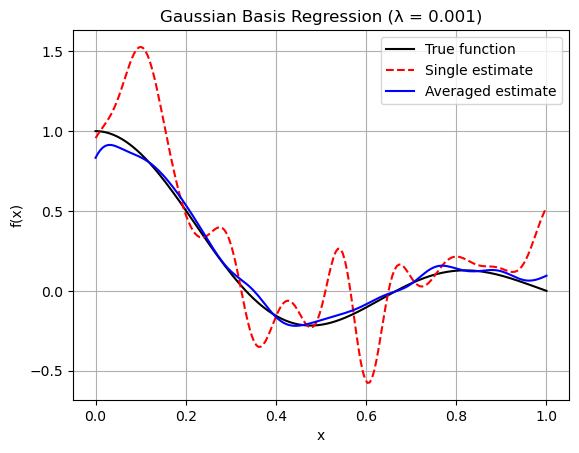

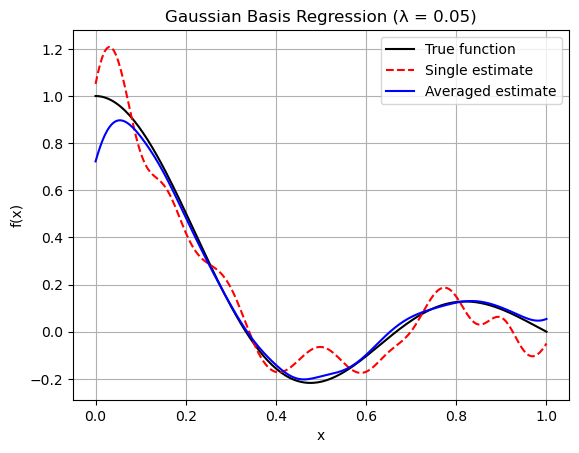

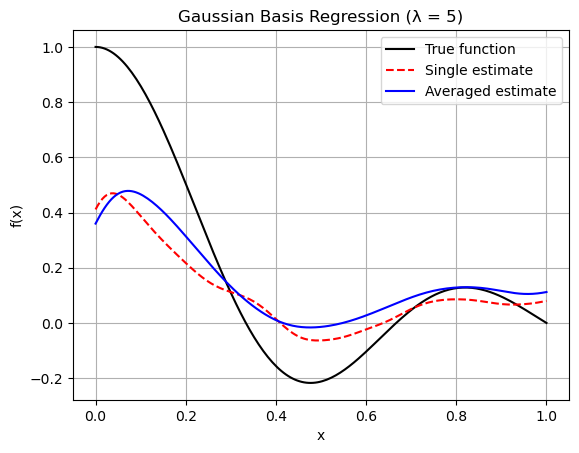

In [10]:
def predict(x, beta, means, var):
    H = H_matrix(x, means, var)
    return H @ beta


means = np.linspace(0, 1, 21)
sigma2 = 0.0016    # sigma = 0.04
lambdas = [0.001, 0.05, 5]

x_plot = np.linspace(0, 1, 200)
f_true = np.sinc(3 * x_plot)

for lam in lambdas:
    #single training set
    x_train, y_train = generate_data()
    beta_hat = regress_gauss(x_train, y_train, means, sigma2, lam)
    f_hat = predict(x_plot, beta_hat, means, sigma2)

    # averaging over 100 runs
    beta_all = np.zeros((100, 21 + 1))

    for i in range(100):
        x_i, y_i = generate_data()
        beta_all[i] = regress_gauss(x_i, y_i, means, sigma2, lam)

    beta_avg = np.mean(beta_all, axis=0)
    f_hat_avg = predict(x_plot, beta_avg, means, sigma2)

    plt.plot(x_plot, f_true, 'k', label='True function')
    plt.plot(x_plot, f_hat, 'r--', label='Single estimate')
    plt.plot(x_plot, f_hat_avg, 'b', label='Averaged estimate')
    #plt.scatter(x_train, y_train, color='green', s=10, marker='o', label='Training samples')
    plt.title(f'Gaussian Basis Regression (λ = {lam})')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

### part 4: estimation error

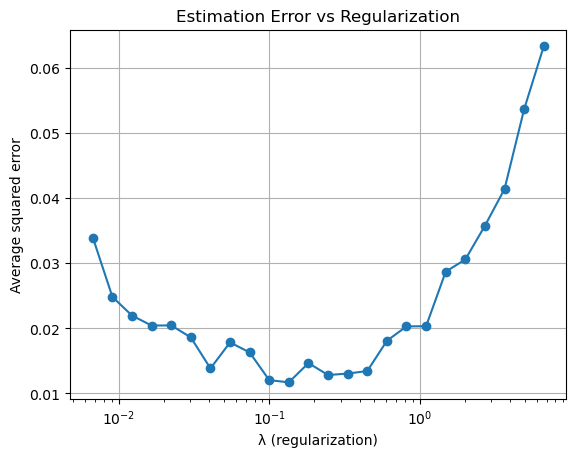

In [5]:
z = np.linspace(0, 1, 100)
f_true = np.sinc(3 * z)

lams = np.exp(np.arange(-5, 2.01, 0.3))
errors = []

for lam in lams:
    err_runs = []

    for _ in range(100):
        x, y = generate_data()
        beta_i = regress_gauss(x, y, means, sigma2, lam)
        f_hat = predict(z, beta_i, means, sigma2)
        err = np.mean((f_true - f_hat)**2)
        err_runs.append(err)

    errors.append(np.mean(err_runs))

plt.figure()
plt.semilogx(lams, errors, marker='o')
plt.xlabel("λ (regularization)")
plt.ylabel("Average squared error")
plt.title("Estimation Error vs Regularization")
plt.grid(True)
plt.show()
